<a href="https://colab.research.google.com/github/shirish-baral/ai-lab/blob/main/robot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A* Time Taken: 0.0003104209899902344
BFS Time Taken: 0.00013256072998046875
UCS Time Taken: 0.00013303756713867188


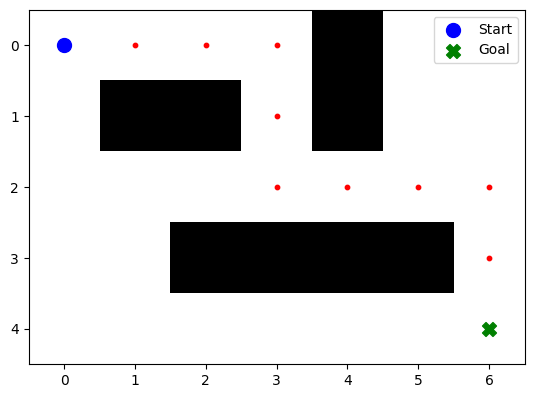

In [2]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
from collections import deque
import time

# Define movement patterns
D4 = [(0,1), (1,0), (0,-1), (-1,0)]  # 4-directional movement
D8 = D4 + [(1,1), (-1,-1), (1,-1), (-1,1)]  # 8-directional movement

def heuristic(a, b, method='manhattan'):
    if method == 'manhattan':
        return abs(a[0] - b[0]) + abs(a[1] - b[1])
    elif method == 'euclidean':
        return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

def a_star(grid, start, goal, diagonal=False):
    rows, cols = grid.shape
    moves = D8 if diagonal else D4
    heuristic_type = 'euclidean' if diagonal else 'manhattan'

    open_list = []
    heapq.heappush(open_list, (0, start))
    came_from = {start: None}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal, heuristic_type)}

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            return reconstruct_path(came_from, current)

        for move in moves:
            neighbor = (current[0] + move[0], current[1] + move[1])
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor] == 0:
                temp_g = g_score[current] + 1
                if neighbor not in g_score or temp_g < g_score[neighbor]:
                    g_score[neighbor] = temp_g
                    f_score[neighbor] = temp_g + heuristic(neighbor, goal, heuristic_type)
                    heapq.heappush(open_list, (f_score[neighbor], neighbor))
                    came_from[neighbor] = current
    return None

def bfs(grid, start, goal):
    rows, cols = grid.shape
    queue = deque([start])
    came_from = {start: None}

    while queue:
        current = queue.popleft()
        if current == goal:
            return reconstruct_path(came_from, current)

        for move in D4:
            neighbor = (current[0] + move[0], current[1] + move[1])
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor] == 0:
                if neighbor not in came_from:
                    queue.append(neighbor)
                    came_from[neighbor] = current
    return None

def ucs(grid, start, goal):
    rows, cols = grid.shape
    priority_queue = [(0, start)]
    came_from = {start: None}
    cost_so_far = {start: 0}

    while priority_queue:
        cost, current = heapq.heappop(priority_queue)
        if current == goal:
            return reconstruct_path(came_from, current)

        for move in D4:
            neighbor = (current[0] + move[0], current[1] + move[1])
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor] == 0:
                new_cost = cost + 1
                if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                    cost_so_far[neighbor] = new_cost
                    heapq.heappush(priority_queue, (new_cost, neighbor))
                    came_from[neighbor] = current
    return None

def reconstruct_path(came_from, current):
    path = []
    while current:
        path.append(current)
        current = came_from[current]
    path.reverse()
    return path

def visualize(grid, path, start, goal):
    plt.imshow(grid, cmap='gray_r')
    for (x, y) in path:
        plt.scatter(y, x, c='red', s=10)
    plt.scatter(start[1], start[0], c='blue', s=100, marker='o', label='Start')
    plt.scatter(goal[1], goal[0], c='green', s=100, marker='X', label='Goal')
    plt.legend()
    plt.show()

# Sample Grid (0 = Free, 1 = Obstacle)
grid = np.array([
    [0, 0, 0, 0, 1, 0, 0],
    [0, 1, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0]
])

start, goal = (0, 0), (4, 6)

# Run Algorithms
start_time = time.time()
path_a_star = a_star(grid, start, goal)
print("A* Time Taken:", time.time() - start_time)

start_time = time.time()
path_bfs = bfs(grid, start, goal)
print("BFS Time Taken:", time.time() - start_time)

start_time = time.time()
path_ucs = ucs(grid, start, goal)
print("UCS Time Taken:", time.time() - start_time)

# Visualize Results
visualize(grid, path_a_star, start, goal)
